In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [44]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [45]:
CLASS_NAMES=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [46]:
validation_images, validation_labels = x_train[:100],y_train[:100]
train_images, train_labels = x_train[100:200],y_train[100:200]


In [47]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

[8]
[3]
[9]
[6]
[6]


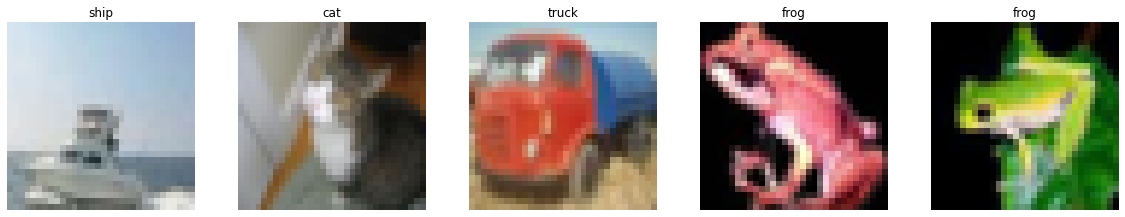

In [48]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)) :
  ax = plt.subplot(5,5, i+1)
  plt.imshow(image)
  print(label.numpy())
  plt.title(CLASS_NAMES[label.numpy()[0]])
  plt.axis('off')



In [49]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validaion_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print(train_ds_size)
print(test_ds_size)
print(validaion_ds_size)

100
10000
100


In [50]:
def process_images (image, label) :
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,(227,227))
  return image, label

In [51]:
train_ds = train_ds.map(process_images).shuffle(buffer_size= train_ds_size).batch(batch_size=32,drop_remainder=True)
test_ds = test_ds.map(process_images).shuffle(buffer_size= train_ds_size).batch(batch_size=32,drop_remainder=True)
vaildation_ds = validation_ds.map(process_images).shuffle(buffer_size= train_ds_size).batch(batch_size=32,drop_remainder=True)

In [54]:
model = Sequential([
                     layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=(32,32)),
                     layers.Conv2D(filters = 96, kernel_size =(11,11), strides=4,activation='relu',input_shape=(227,227,3)),
                     layers.BatchNormalization(),
                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                     layers.Conv2D(filters=256, kernel_size=(5,5), strides=1, activation='relu', padding='same'),
                     layers.BatchNormalization(),
                     layers.MaxPool2D(pool_size=(3,3), strides=2),

                     layers.Conv2D(filters= 384, kernel_size=(3,3), strides=1, activation='relu',padding='same'),
                     layers.BatchNormalization(),
                     
                     layers.Conv2D(filters= 384, kernel_size=(3,3), strides=1, activation='relu',padding='same'),
                     layers.BatchNormalization(),

                     layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'),
                     layers.BatchNormalization(),
                     layers.MaxPool2D(pool_size=(3,3), strides=2),
                     layers.Flatten(),

                     layers.Dense(4096, activation='relu'),
                     layers.Dense(4096, activation ='relu'),
                     layers.Dense(10, activation = 'softmax')
])

model.summary()

ValueError: ignored

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.fit(train_ds,
          epochs=10,
          validation_data=validation_ds)

In [ ]:
model.evaluate(test_ds)